# Prediction Using Unsupervised ML

**Task 2: From the given IRIS Dataset , predict the optimum number of clusters and represent it visually.

**by: Atosi Roy

In [68]:
#Step 1: import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [69]:
#Step 2: Load the iris dataset and create a pandas dataframe
df = pd.read_csv("F:\Sparks Foundation\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [71]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0    False          False         False          False         False    False
1    False          False         False          False         False    False
2    False          False         False          False         False    False
3    False          False         False          False         False    False
4    False          False         False          False         False    False
..     ...            ...           ...            ...           ...      ...
145  False          False         False          False         False    False
146  False          False         False          False         False    False
147  False          False         False          False         False    False
148  False          False         False          False         False    False
149  False          False         False          False         False    False

[

In [72]:
df = df.drop(columns= ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:>

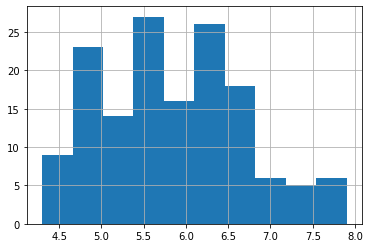

In [74]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

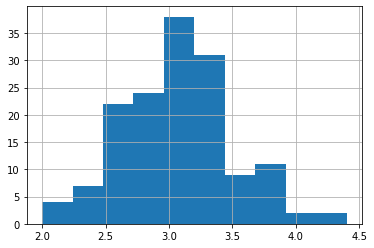

In [75]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

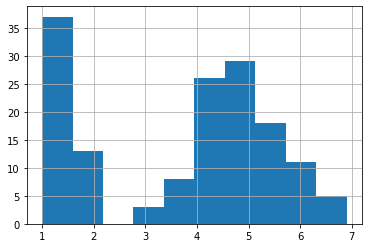

In [76]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

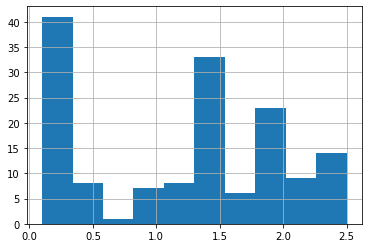

In [77]:
df['PetalWidthCm'].hist()

In [78]:
#Scatterplot to find optimal clusters
colours = ['red', 'orange', 'blue']
species = ['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']

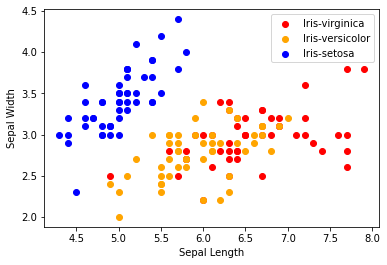

In [80]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c= colours[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

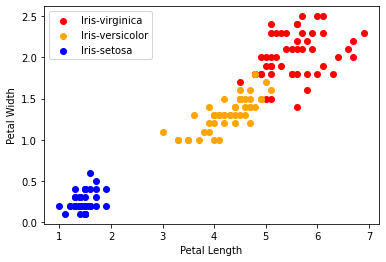

In [81]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c= colours[i], label=species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

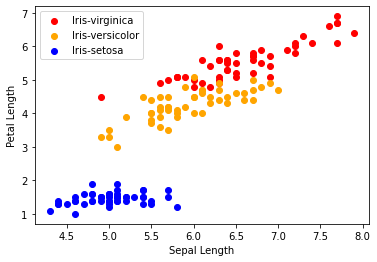

In [82]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], c= colours[i], label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Petal Length")
    plt.legend()

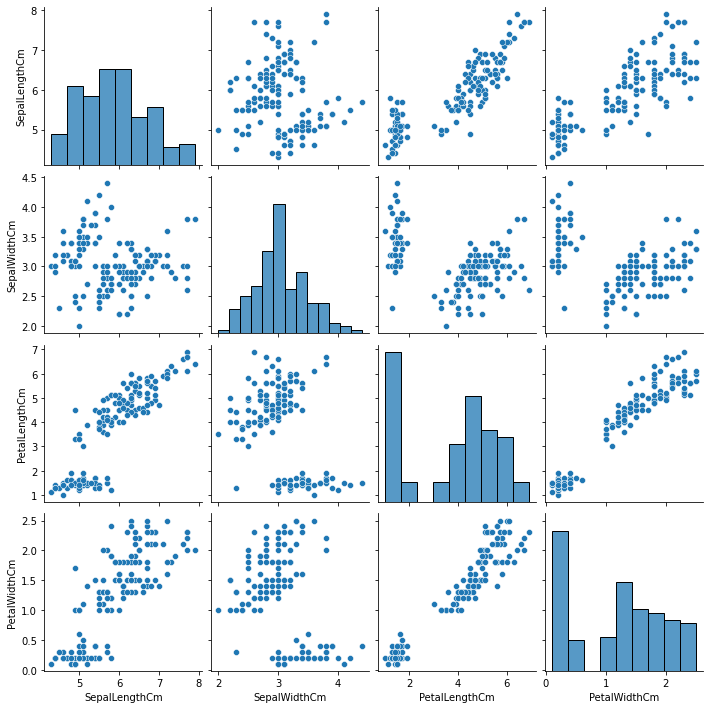

In [83]:
sns.pairplot(df)

In [84]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

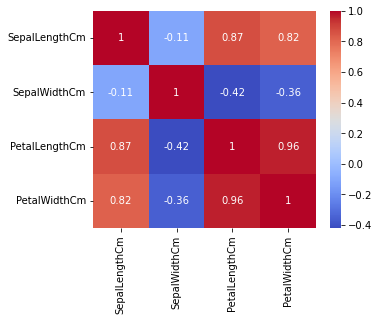

In [85]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [87]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [88]:
from sklearn.model_selection import train_test_split
#train - 70
#test - 30
X = df.drop(columns= ['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test =  train_test_split(X,Y, test_size=0.30)

In [89]:
#knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [90]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [91]:
#print metric to get performance
print("Accuracy: ", model.score(x_test, y_test)*100)

Accuracy:  95.55555555555556


In [92]:
#let us check by the elbow method also
from sklearn.cluster import KMeans

C:\Users\Arnav\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


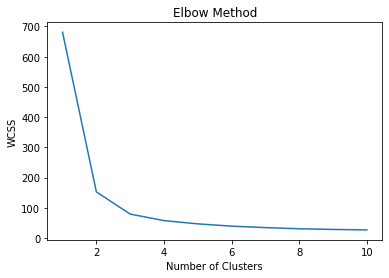

In [94]:
x = df.iloc[:, [0,1,2,3]].values
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [99]:
#Assigning the 'kmeans' classifier
kmeans = KMeans(n_clusters= 3,init = 'k-means++',max_iter = 300,n_init = 10,random_state= 10)
y_kmeans = kmeans.fit_predict(x)

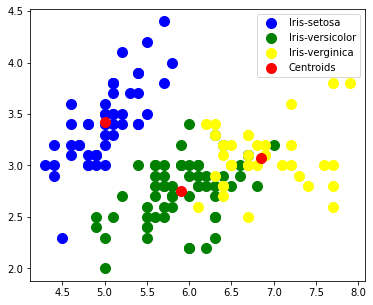

In [100]:
#Cluster Visualization
plt.figure(figsize = (6,5))


plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1] , s = 100,c = 'blue',label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1] , s = 100,c = 'green',label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1] , s = 100,c = 'yellow',label = 'Iris-verginica')

#Centroid Plotting of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 100,c = 'red',label = 'Centroids')
plt.legend()
plt.show()

# So, we can predict that the optimal cluster here is 3, since a clear elbow is seen to be formed at 3. We can also see that the accuracy score is ~ 100%